<a href="https://colab.research.google.com/github/kKn00077/techit-travel-data-analysis/blob/main/Domestic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and direc

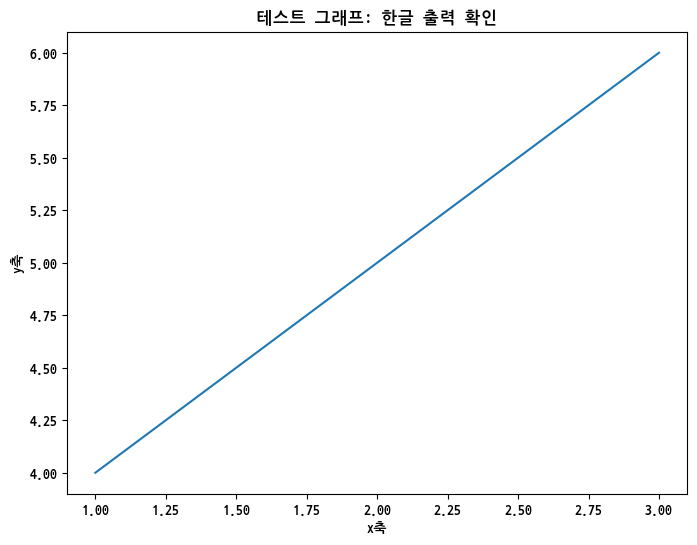

In [4]:
# 구글 코랩 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 경로 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf'

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 테스트 그래프
plt.figure(figsize=(8, 6))
plt.title("테스트 그래프: 한글 출력 확인")
plt.plot([1, 2, 3], [4, 5, 6])
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
means_df = pd.read_csv("/content/drive/MyDrive/project/data/project1/20241117190346.csv", encoding="euc-kr", sep=',', index_col=None)
means_df.columns = ['기준년월', '지자체', '방문자 구분', '방문자수']

display(means_df.head(1020), means_df.shape)


,기준년월,지자체,방문자 구분,방문자수
0,202311,서울특별시,현지인방문자(a),136090934.0
1,202311,서울특별시,외지인방문자(b),48357250.0
2,202311,서울특별시,외국인방문자(c),1094516.0
3,202311,서울특별시,외부방문자(b+c),49451765.0
4,202311,서울특별시,전체방문자(a+b+c),185542699.0
...,...,...,...,...
1015,202410,전북특별자치도,현지인방문자(a),32216030.0
1016,202410,전북특별자치도,외지인방문자(b),8243739.0
1017,202410,전북특별자치도,외국인방문자(c),48511.0
1018,202410,전북특별자치도,외부방문자(b+c),8292250.0


(1020, 4)

In [7]:
!fc-list :lang=ko


/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGothic,나눔바른고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf: NanumGothic,나눔고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf: NanumSquare,나눔스퀘어:style=Regular
/us

<Figure size 640x480 with 0 Axes>

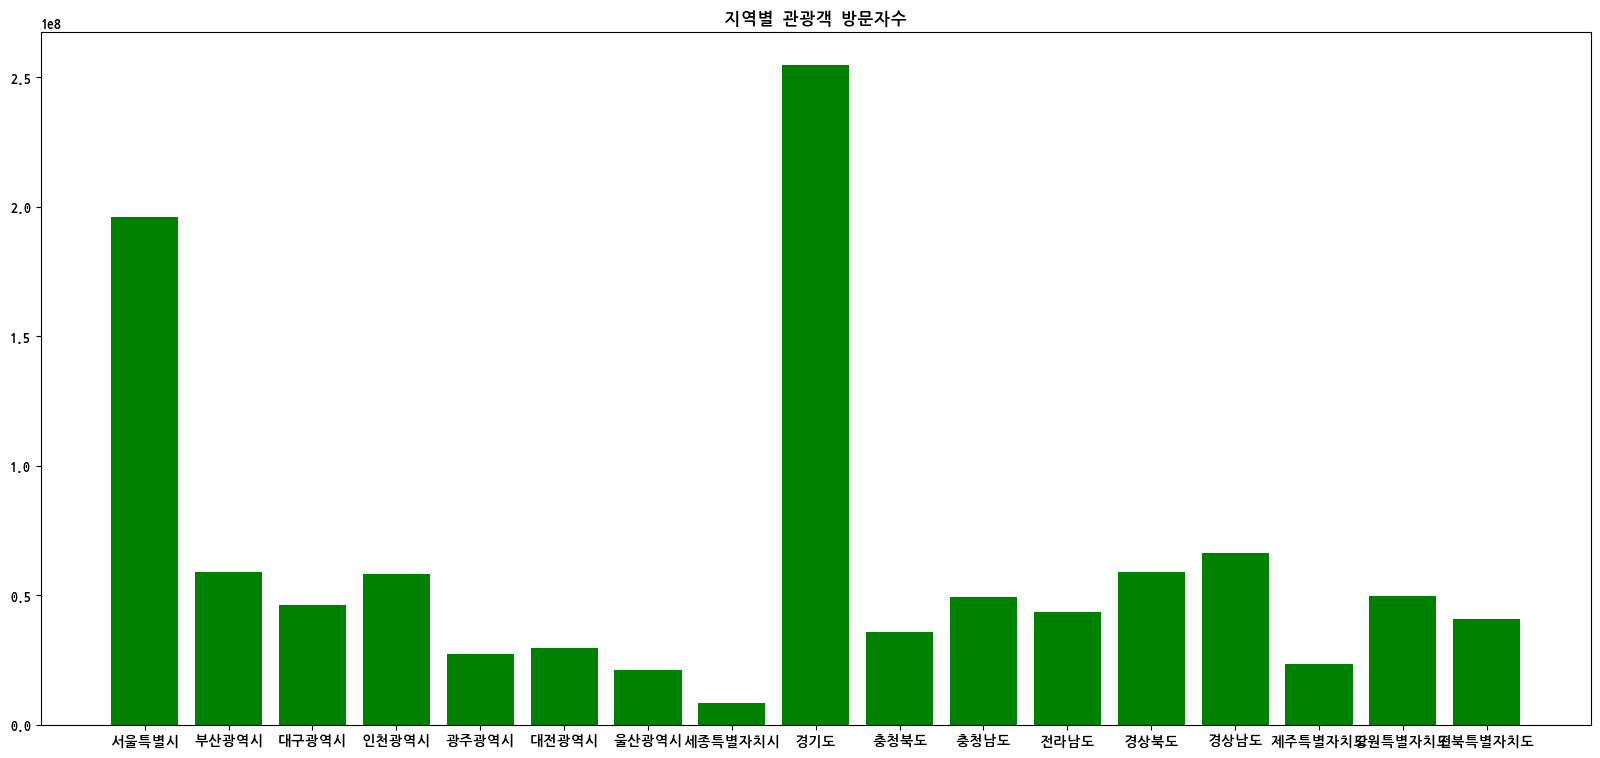

In [31]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 경로 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf'

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


means_df = pd.read_csv("/content/drive/MyDrive/project/data/project1/20241117190346.csv", encoding="euc-kr", sep=',', index_col=None)
means_df.columns = ['기준년월', '지자체', '방문자 구분', '방문자수']

plt.tight_layout()

plt.figure(figsize=(20, 9))
bars = plt.bar(means_df["지자체"], means_df["방문자수"], color='green')

plt.title("지역별 관광객 방문자수")
plt.show()

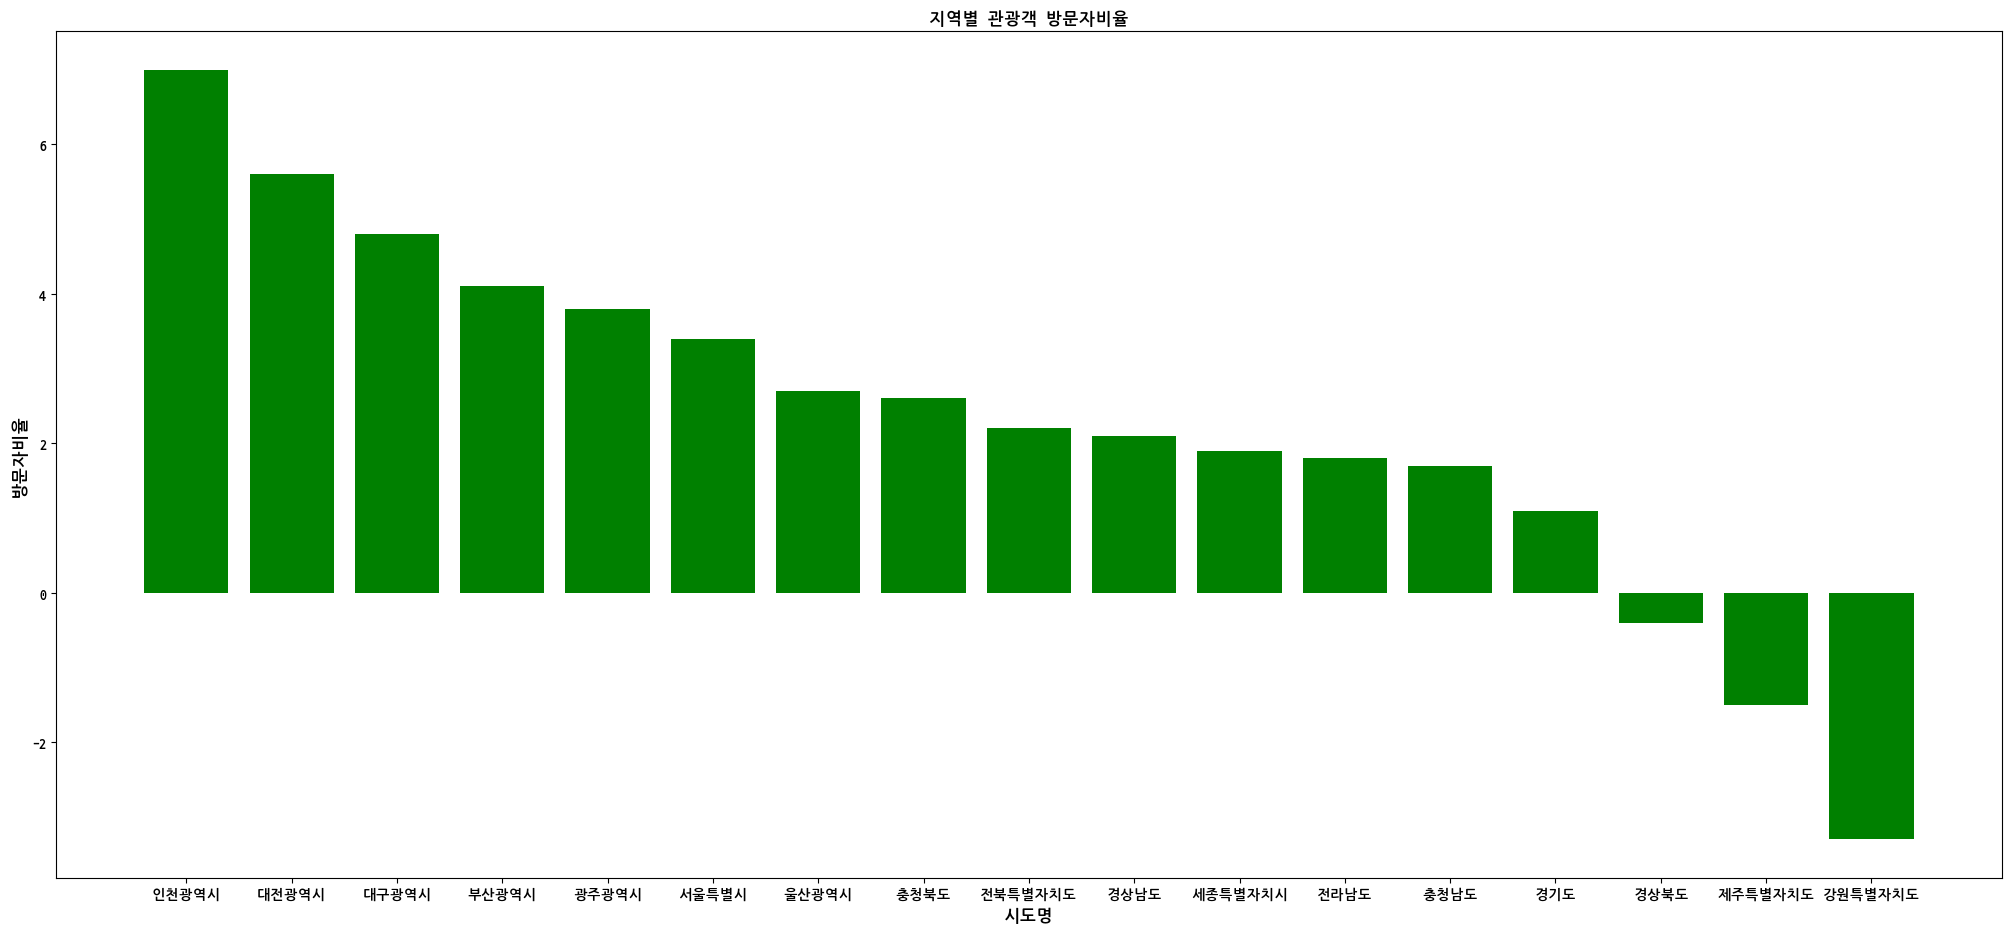

In [50]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241108163329_표_방문자수최다지역.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

# 한글 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 경로 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf'

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 데이터 컬럼 이름 지정
# 첫 번째 컬럼은 '시도명', 두 번째 컬럼은 '지출액'으로 설정
travel_df.columns = ['시도명','방문자비율']

# 그래프 생성
plt.figure(figsize=(20,9 ))
bars = plt.bar(travel_df["시도명"], travel_df["방문자비율"], color='green')

plt.tight_layout()

# x축과 y축 라벨 추가
plt.xlabel("시도명", fontsize=12)
plt.ylabel("방문자비율", fontsize=12)

# 그래프 출력
plt.title("지역별 관광객 방문자비율")
plt.show()

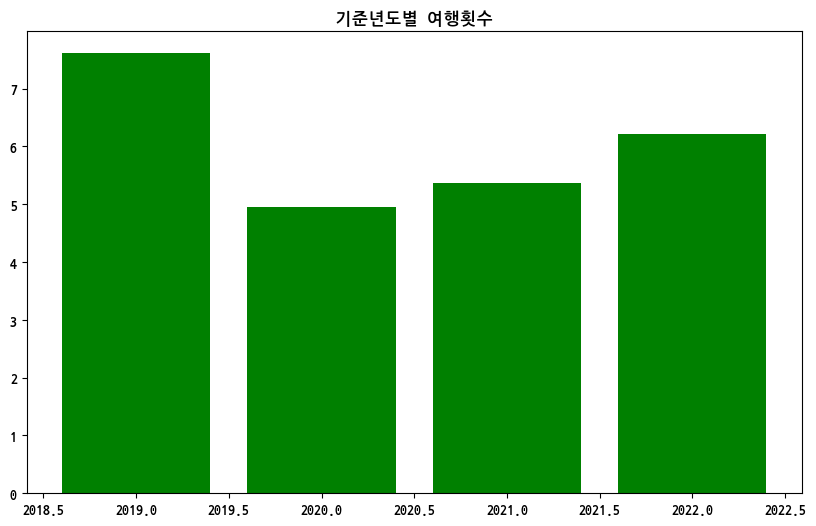

In [51]:
all_df = pd.read_csv("/content/drive/MyDrive/project/data/project1/20241118034609_국내여행 횟수(국내 전체).csv", encoding="euc-kr", sep=',', index_col=None)
all_df.columns = ['기준년도','연령대', '여행 횟수']

# 한글 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 경로 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf'

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(all_df["기준년도"], all_df["여행 횟수"], color='green')

plt.title("기준년도별 여행횟수")
plt.show()


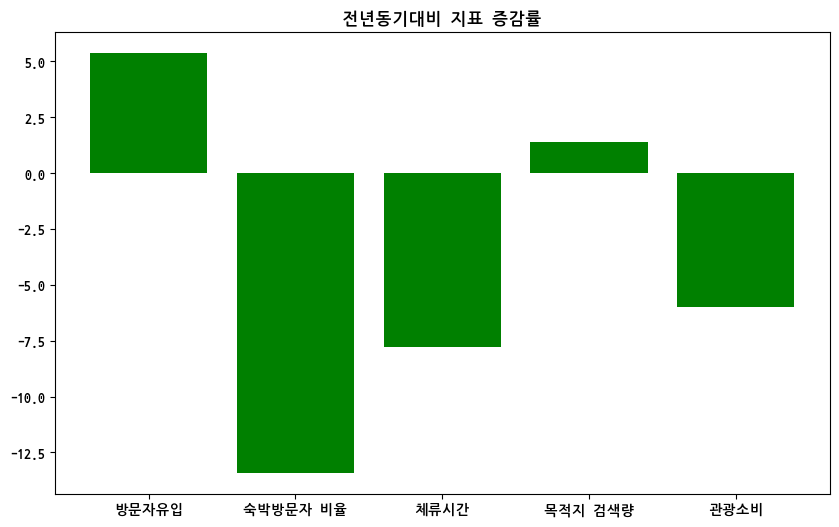

In [52]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241118040155_지역관광진단(전년동기대비).csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

# 한글 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 경로 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf'

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


travel_df.columns = ['지표명','지표 증감률']

# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(travel_df["지표명"], travel_df["지표 증감률"], color='green')

plt.title("전년동기대비 지표 증감률")
plt.show()

<Figure size 640x480 with 0 Axes>

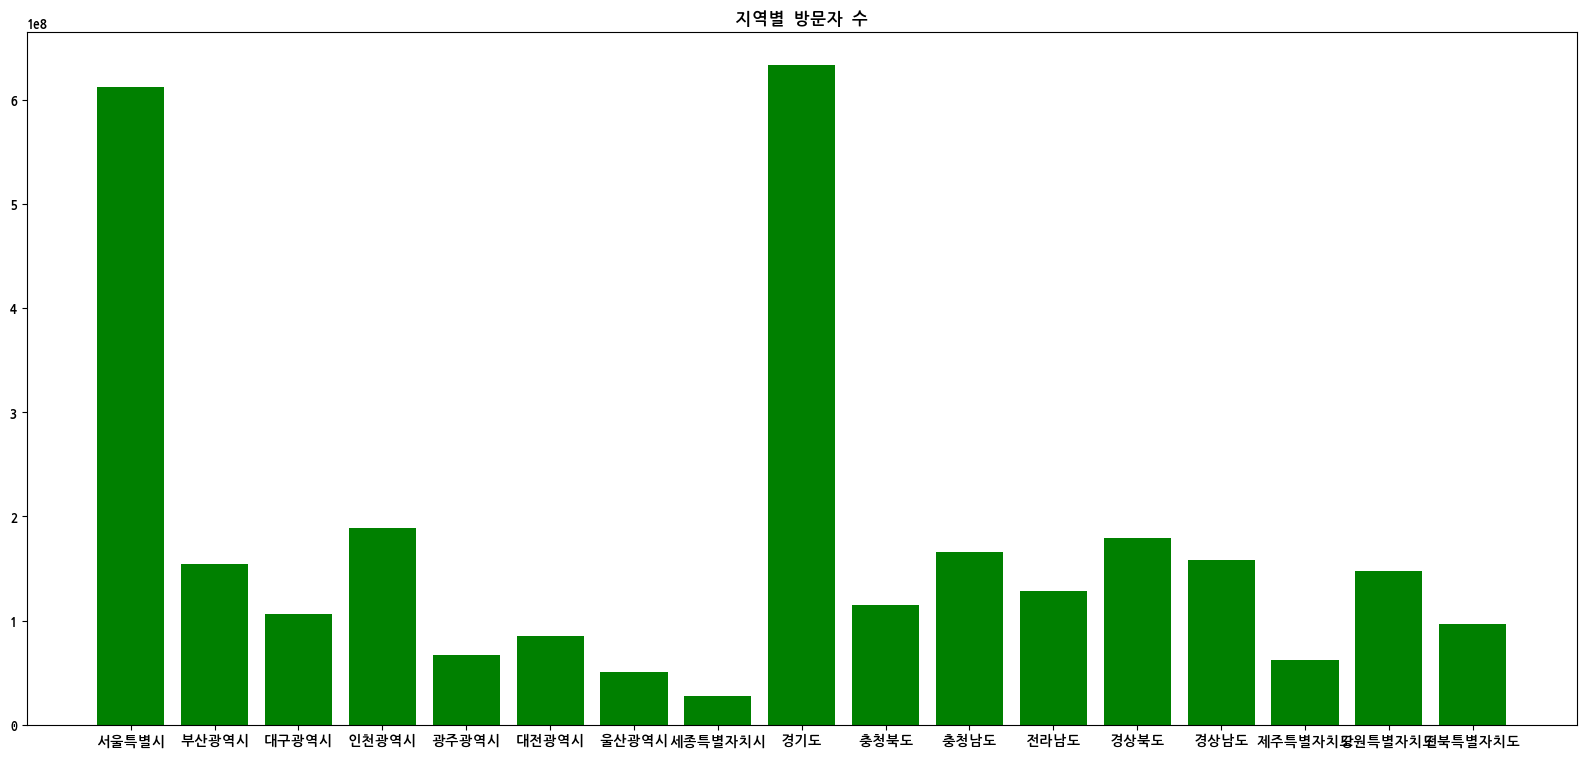

In [53]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241117190308_방문자수 히트맵.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체','방문자 수']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체"], travel_df["방문자 수"], color='green')

plt.title("지역별 방문자 수")
plt.show()

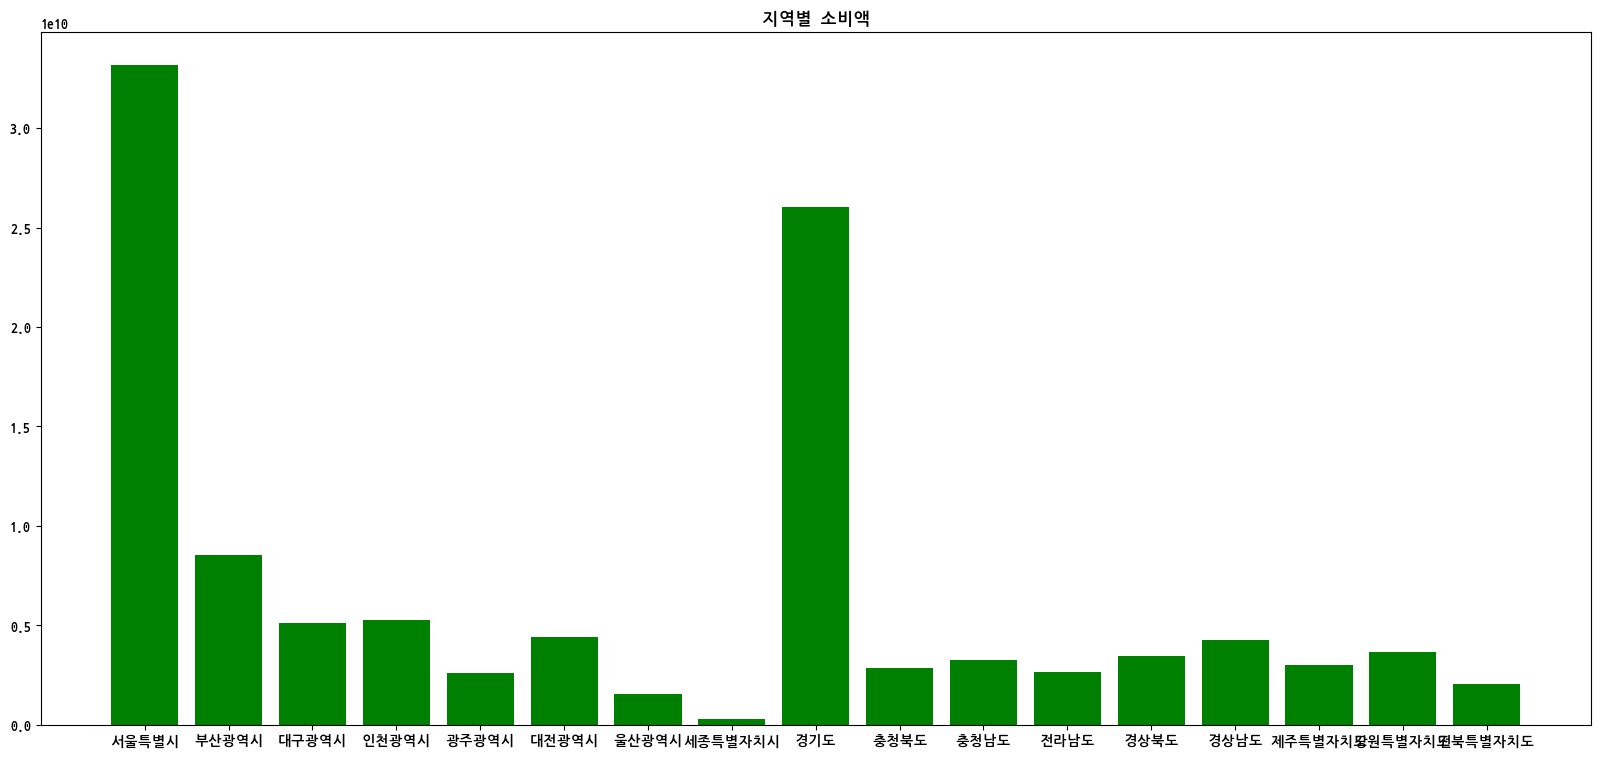

In [54]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241108154425_관광소비 히트맵.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체','소비액', '전년동기 소비액', '전년대비 소비증감률']

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체"], travel_df["소비액"], color='green')

plt.title("지역별 소비액")
plt.show()

<Figure size 640x480 with 0 Axes>

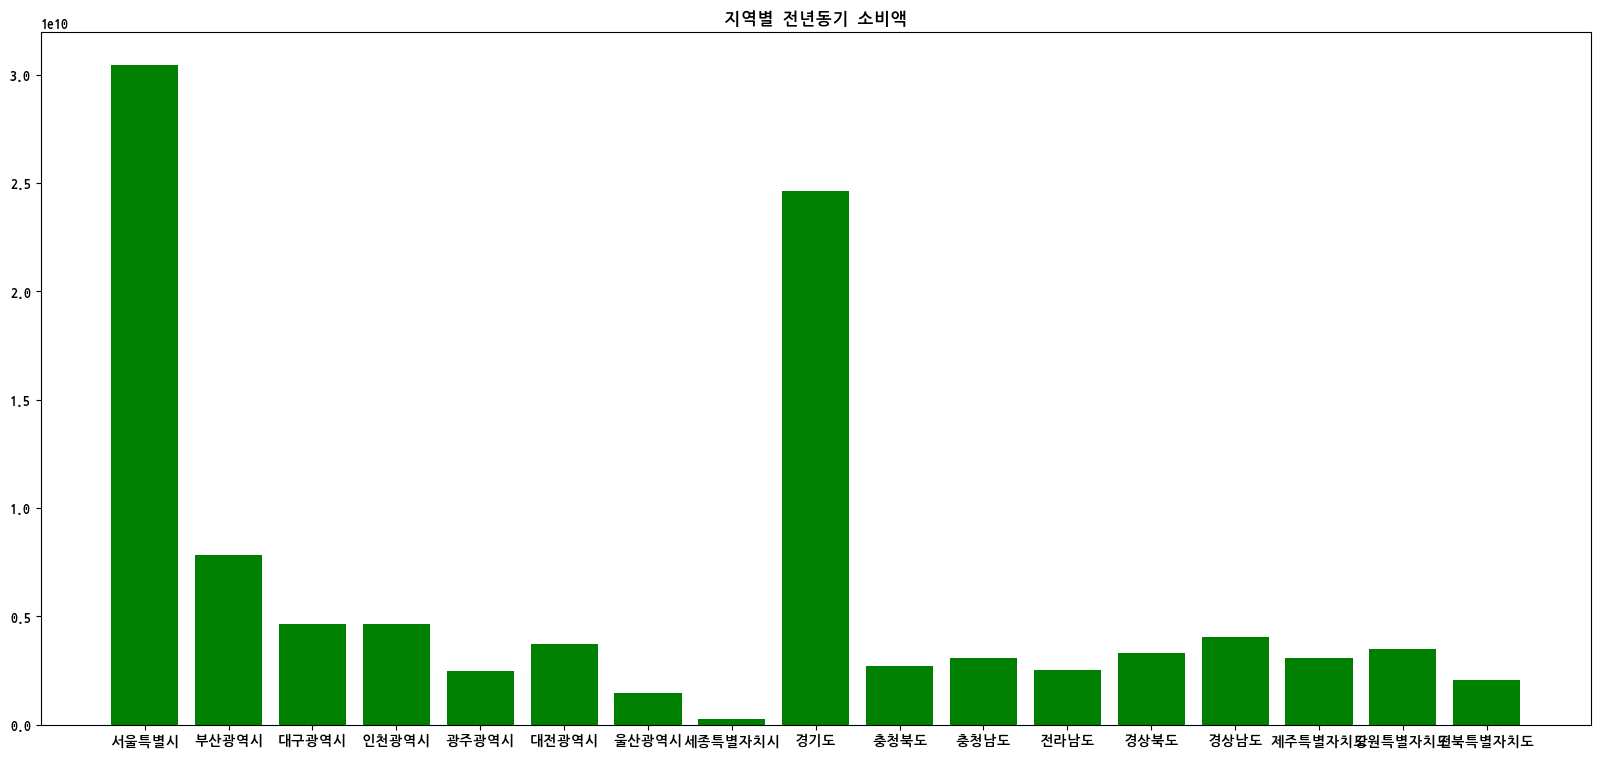

In [55]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241108154425_관광소비 히트맵.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체','소비액', '전년동기 소비액', '전년대비 소비증감률']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체"], travel_df["전년동기 소비액"], color='green')

plt.title("지역별 전년동기 소비액")
plt.show()

<Figure size 640x480 with 0 Axes>

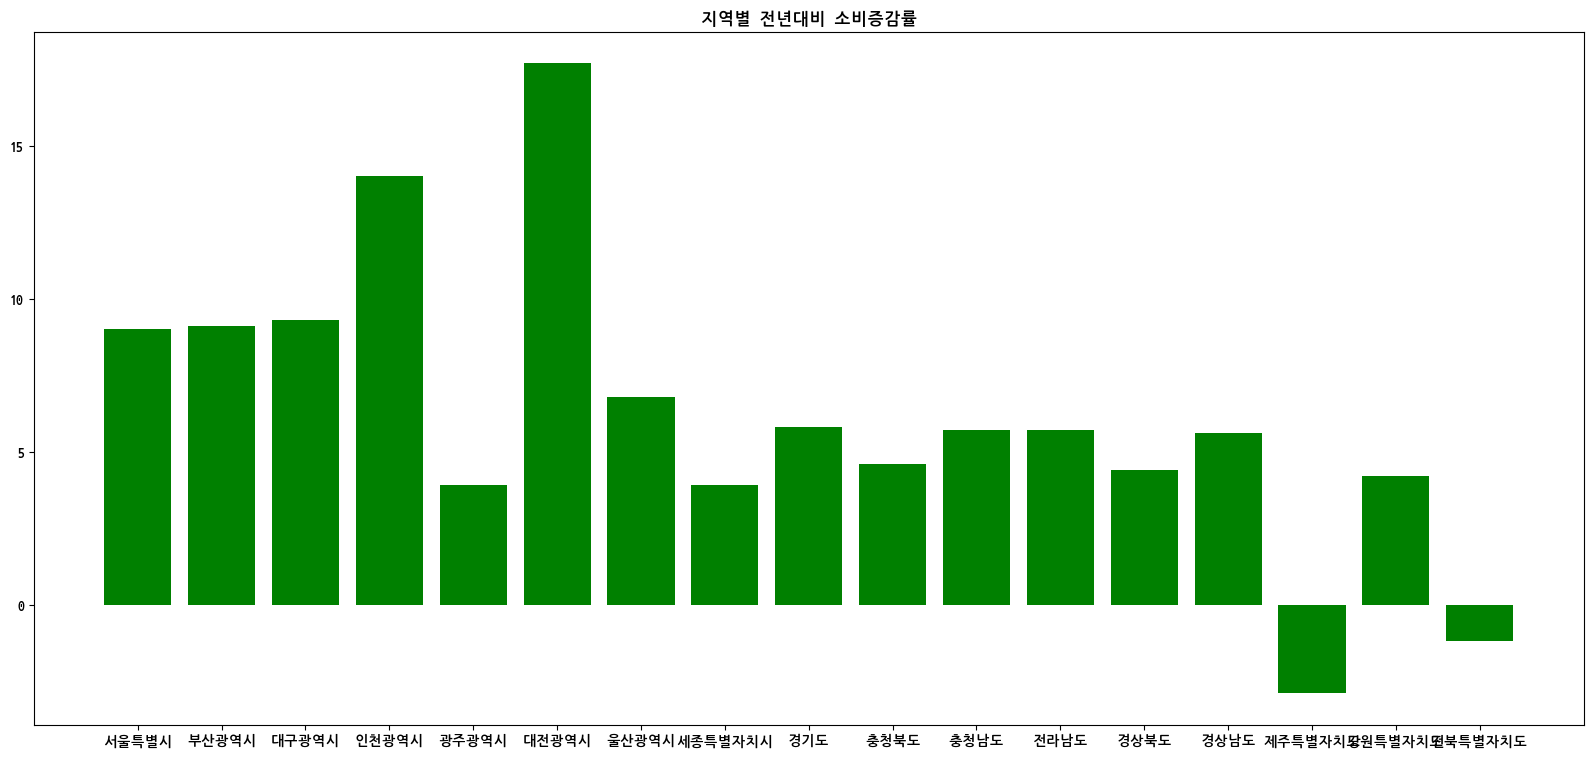

In [56]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241108154425_관광소비 히트맵.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체','소비액', '전년동기 소비액', '전년대비 소비증감률']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체"], travel_df["전년대비 소비증감률"], color='green')

plt.title("지역별 전년대비 소비증감률")
plt.show()

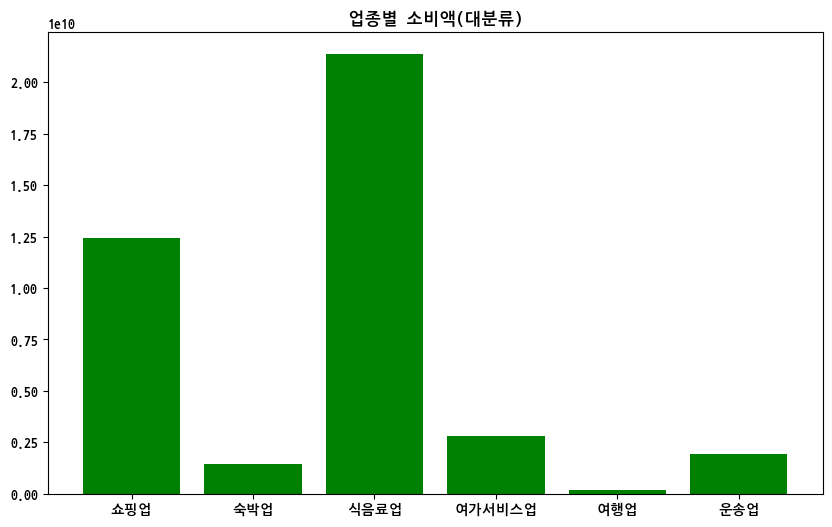

In [59]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171136_업종별 지출액.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['대분류','중분류', '대분류 소비액(천원)', '대분류 지출액 비율', '중분류 소비액(천원)', '중분류 지출액 비율']

# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(travel_df["대분류"], travel_df["대분류 소비액(천원)"], color='green')

plt.title("업종별 소비액(대분류)")
plt.show()

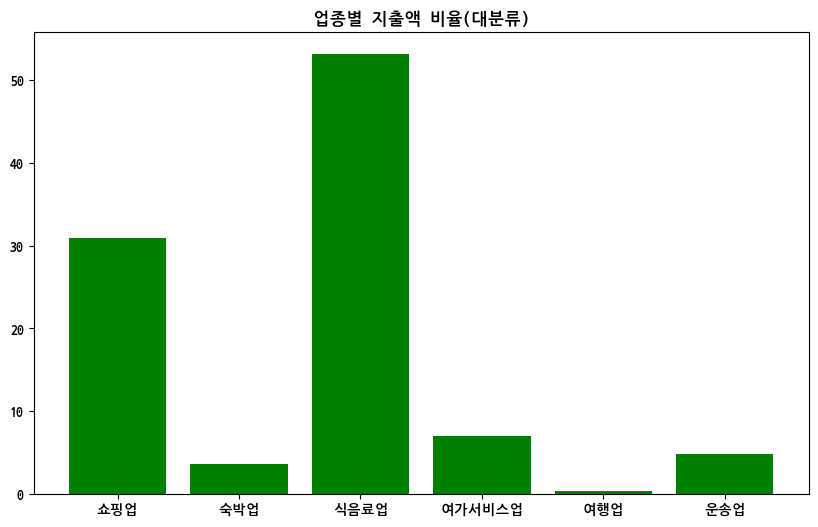

In [60]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171136_업종별 지출액.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['대분류','중분류', '대분류 소비액(천원)', '대분류 지출액 비율', '중분류 소비액(천원)', '중분류 지출액 비율']

# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(travel_df["대분류"], travel_df["대분류 지출액 비율"], color='green')

plt.title("업종별 지출액 비율(대분류)")
plt.show()

<Figure size 640x480 with 0 Axes>

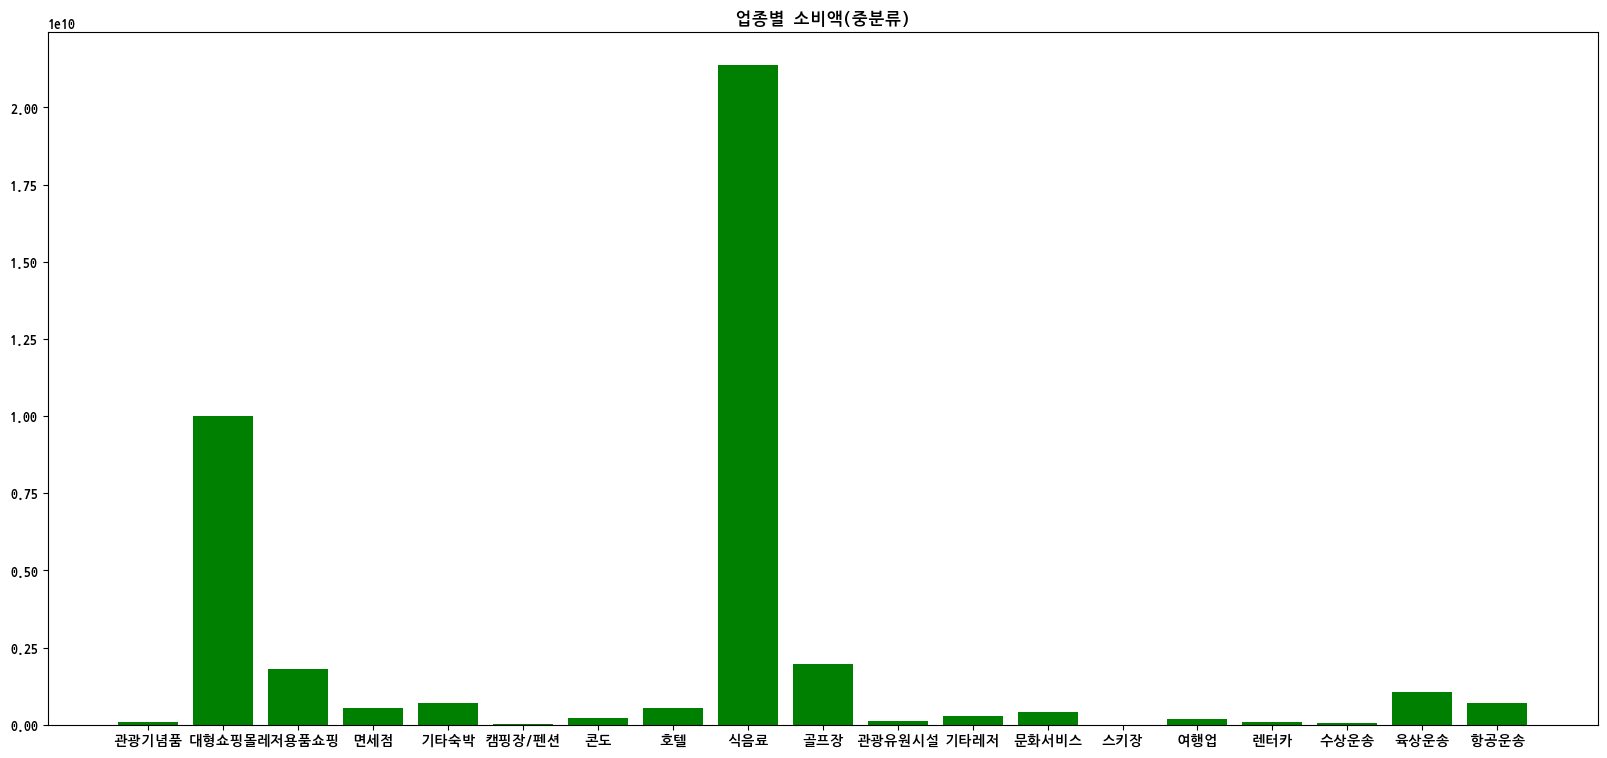

In [62]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171136_업종별 지출액.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['대분류','중분류', '대분류 소비액(천원)', '대분류 지출액 비율', '중분류 소비액(천원)', '중분류 지출액 비율']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["중분류"], travel_df["중분류 소비액(천원)"], color='green')

plt.title("업종별 소비액(중분류)")
plt.show()

<Figure size 640x480 with 0 Axes>

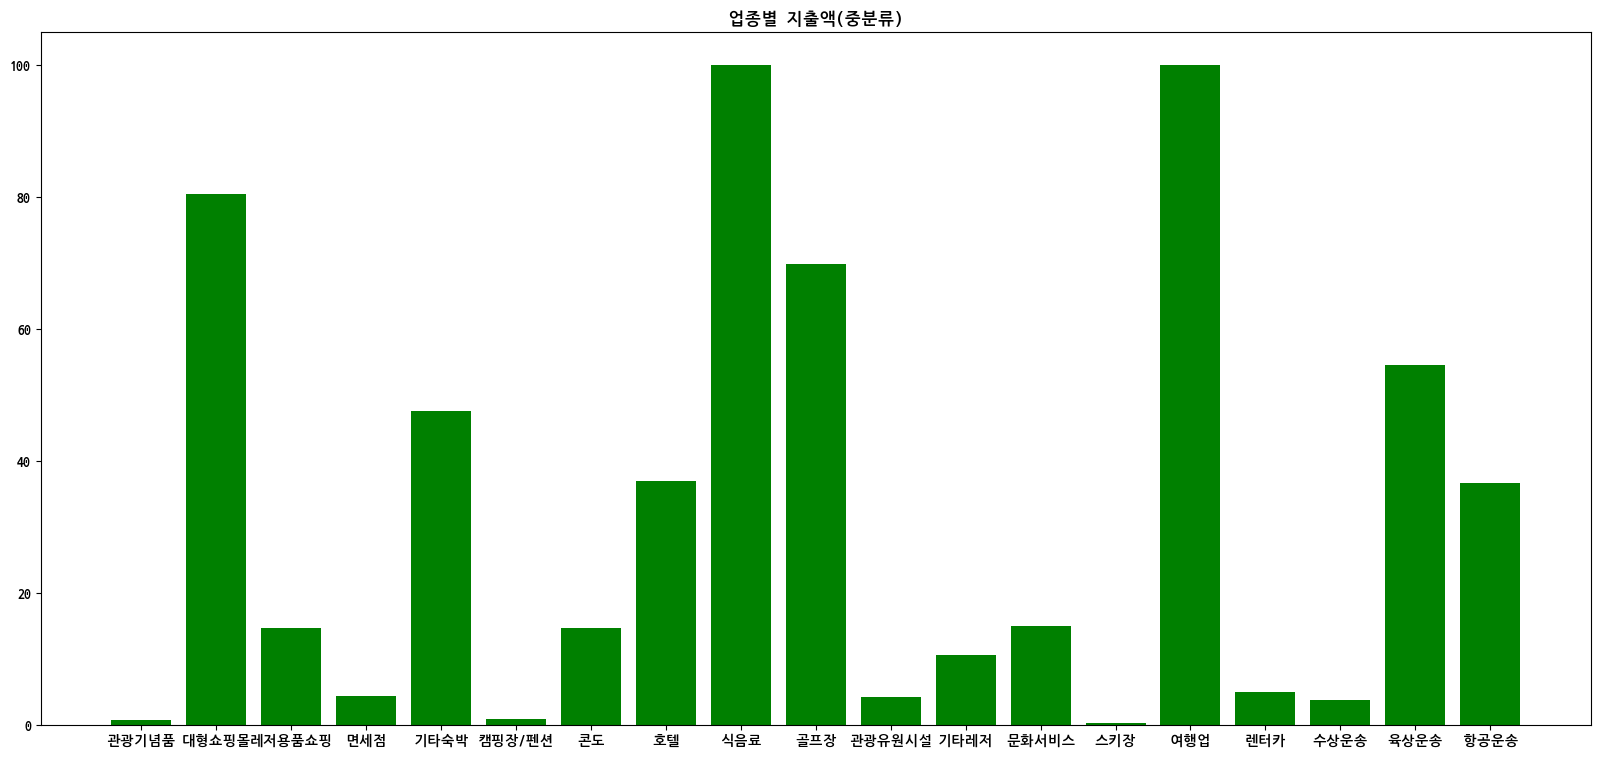

In [63]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171136_업종별 지출액.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['대분류','중분류', '대분류 소비액(천원)', '대분류 지출액 비율', '중분류 소비액(천원)', '중분류 지출액 비율']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["중분류"], travel_df["중분류 지출액 비율"], color='green')

plt.title("업종별 지출액(중분류)")
plt.show()

<Figure size 640x480 with 0 Axes>

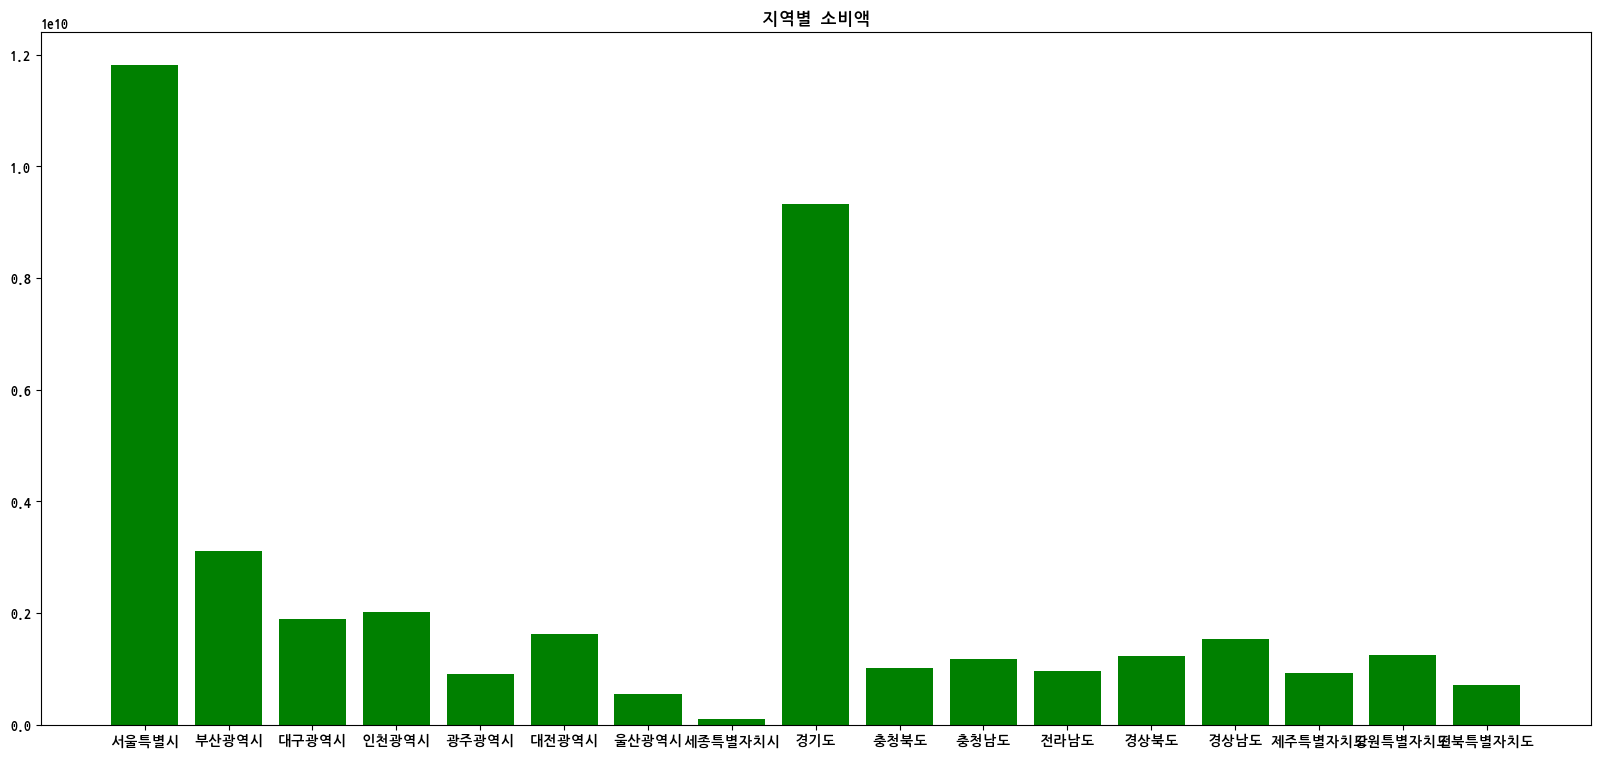

In [65]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171143_관광소비 히트맵.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체', '소비액', '전년동기 소비액', '전년대비 소비증감률']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체"], travel_df["소비액"], color='green')

plt.title("지역별 소비액")
plt.show()

<Figure size 640x480 with 0 Axes>

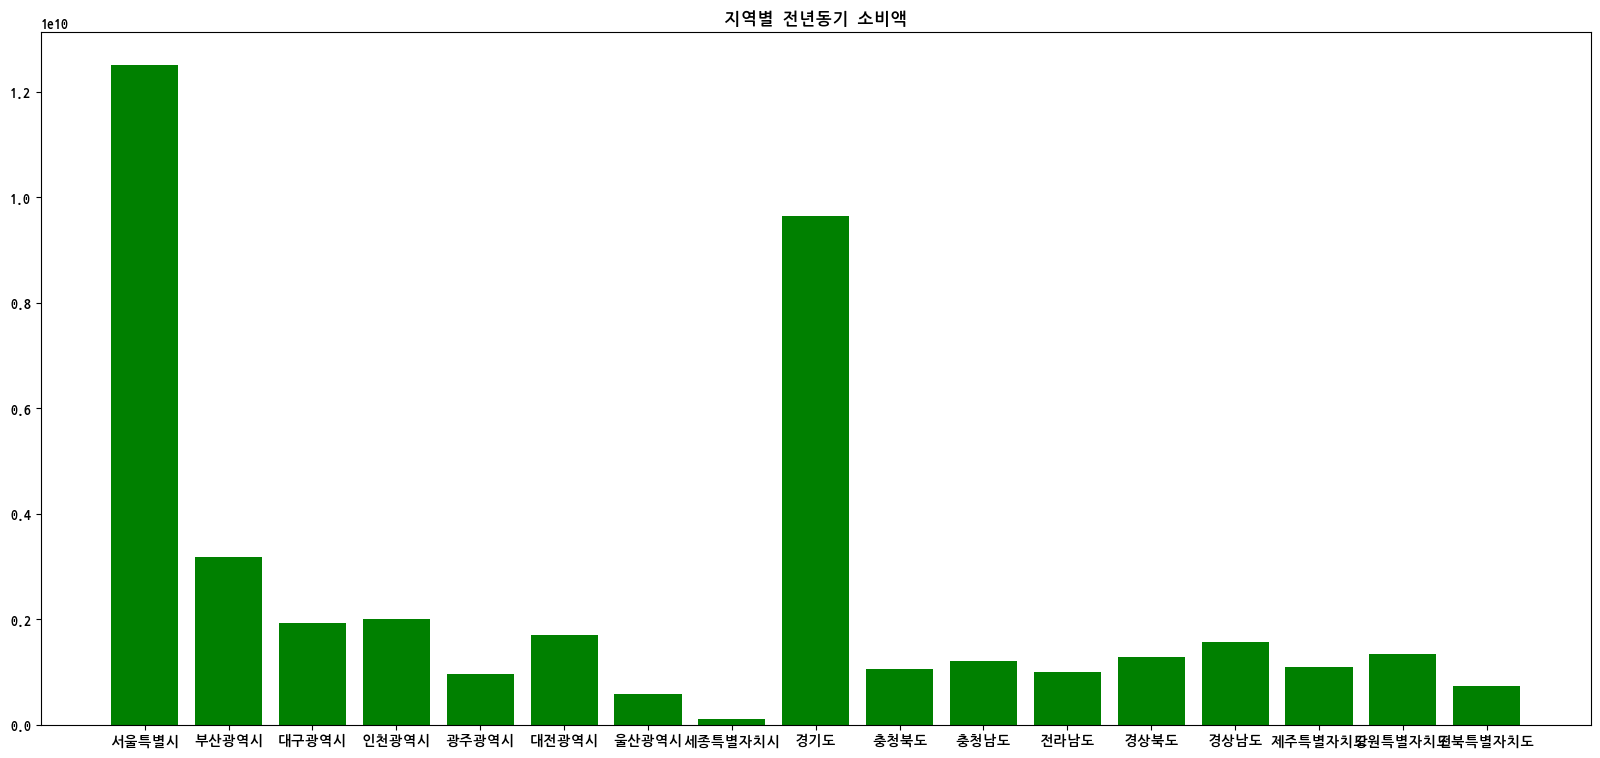

In [66]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171143_관광소비 히트맵.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체', '소비액', '전년동기 소비액', '전년대비 소비증감률']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체"], travel_df["전년동기 소비액"], color='green')

plt.title("지역별 전년동기 소비액")
plt.show()

<Figure size 640x480 with 0 Axes>

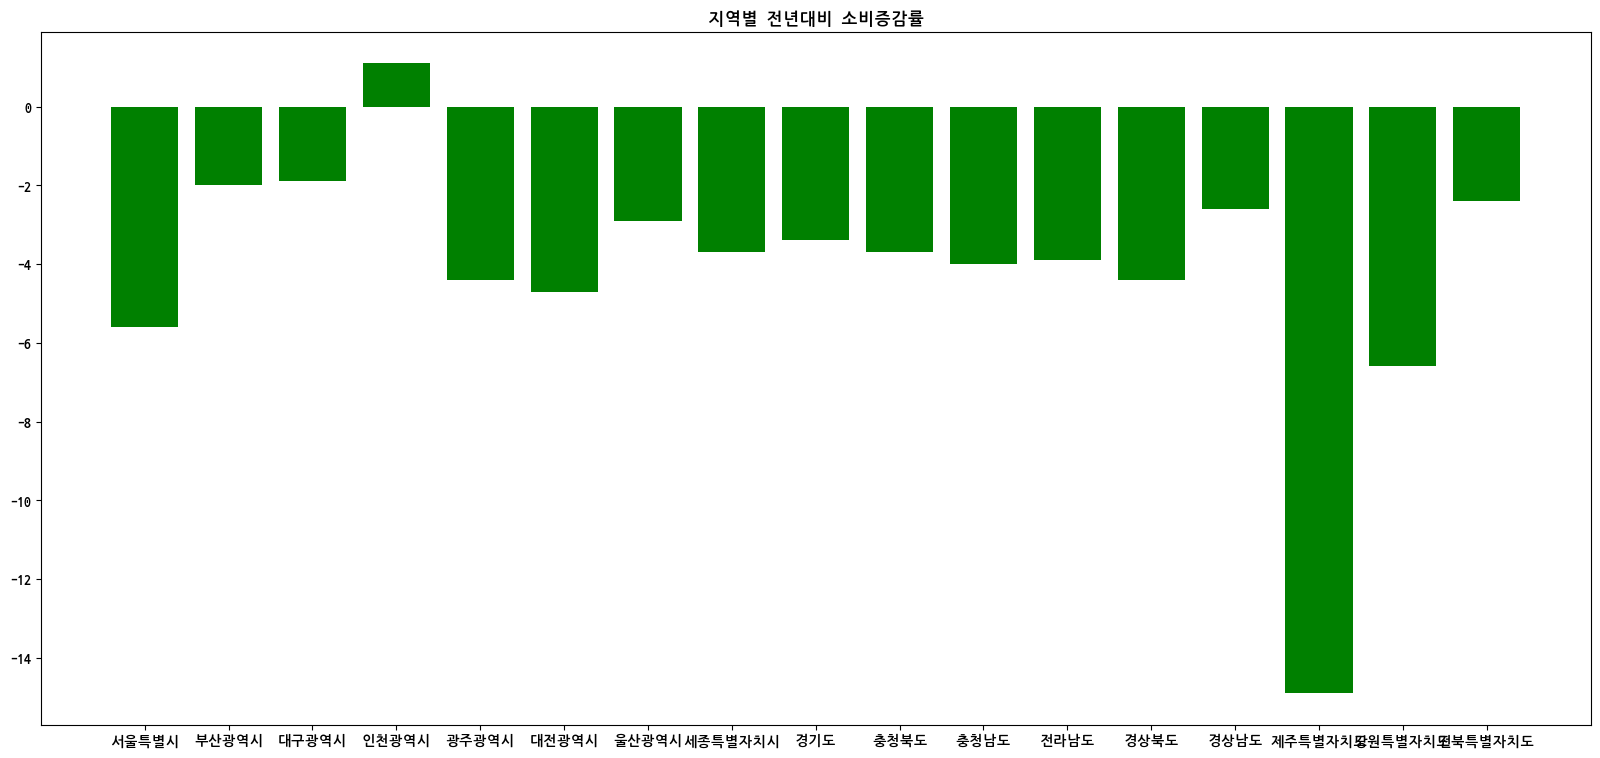

In [67]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171143_관광소비 히트맵.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체', '소비액', '전년동기 소비액', '전년대비 소비증감률']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체"], travel_df["전년대비 소비증감률"], color='green')

plt.title("지역별 전년대비 소비증감률")
plt.show()

<Figure size 640x480 with 0 Axes>

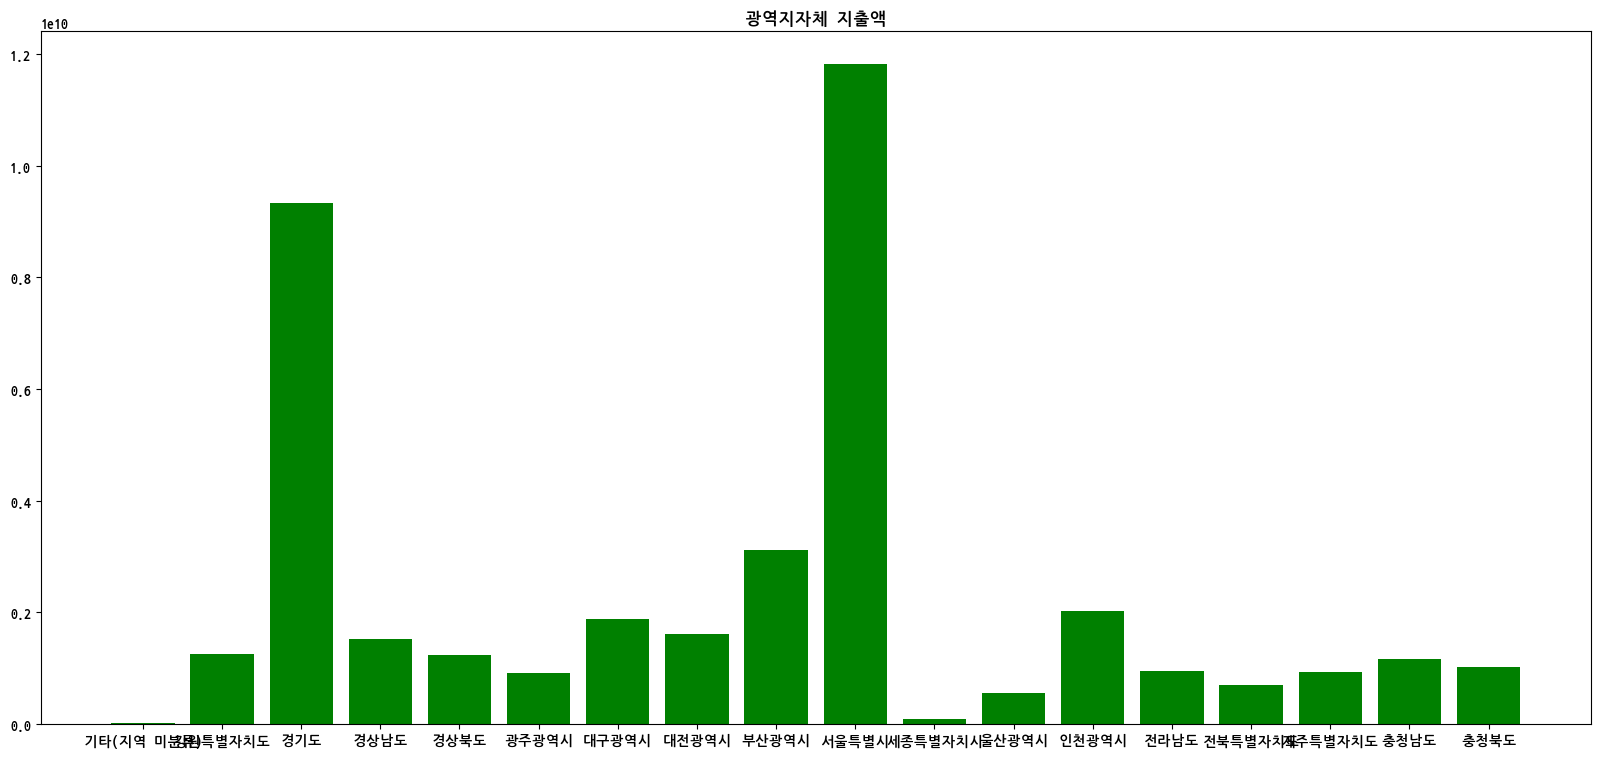

In [68]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171150_지역별 지출액.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체 명', '기초지자체 명', '광역지자체 지출액', '광역지자체 지출액 비율', '기초지자체 지출액', '기초지자체 지출액 비율']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체 명"], travel_df["광역지자체 지출액"], color='green')

plt.title("광역지자체 지출액")
plt.show()

<Figure size 640x480 with 0 Axes>

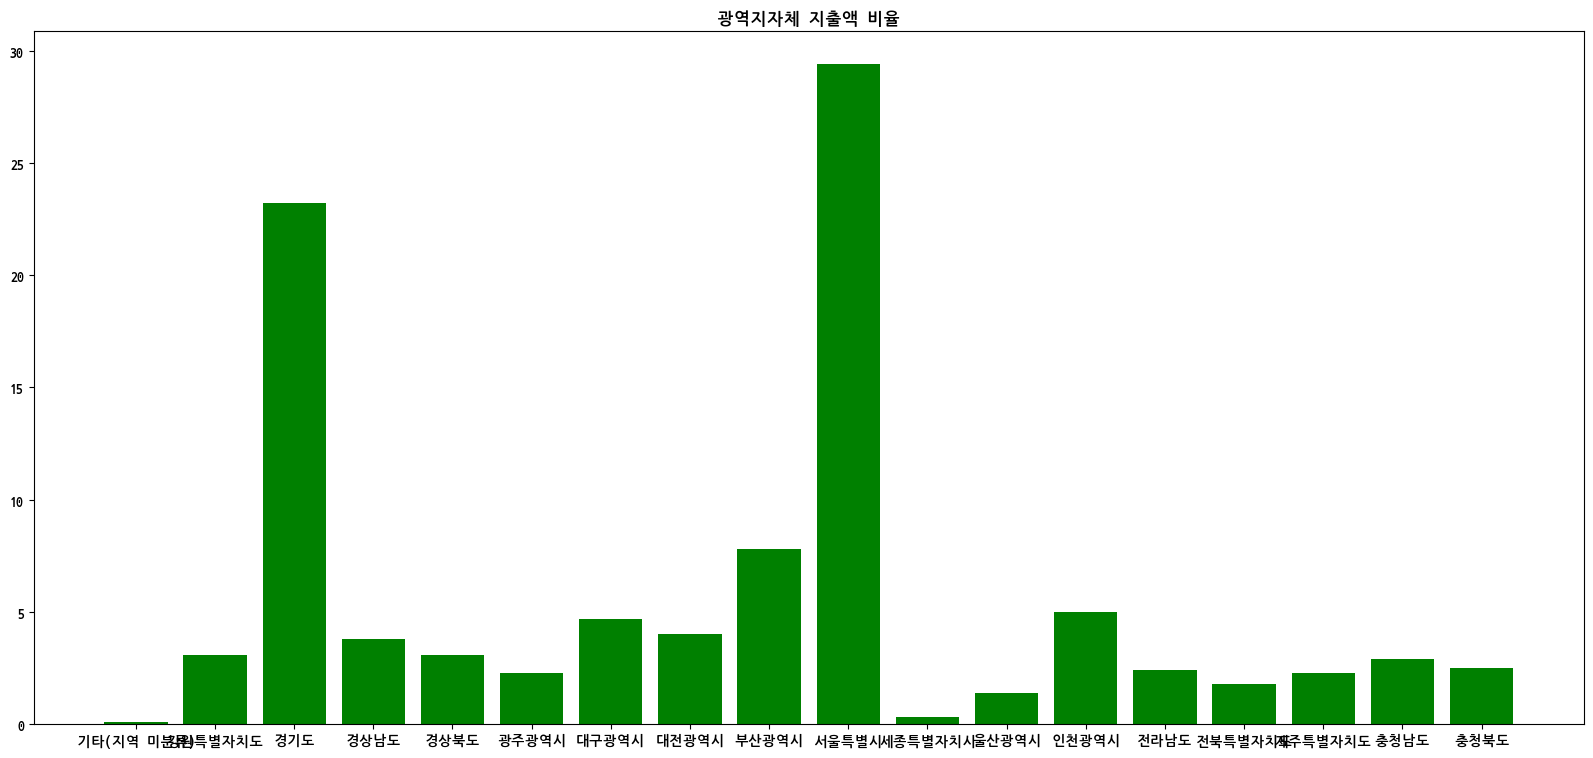

In [69]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120171150_지역별 지출액.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['광역지자체 명', '기초지자체 명', '광역지자체 지출액', '광역지자체 지출액 비율', '기초지자체 지출액', '기초지자체 지출액 비율']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["광역지자체 명"], travel_df["광역지자체 지출액 비율"], color='green')

plt.title("광역지자체 지출액 비율")
plt.show()

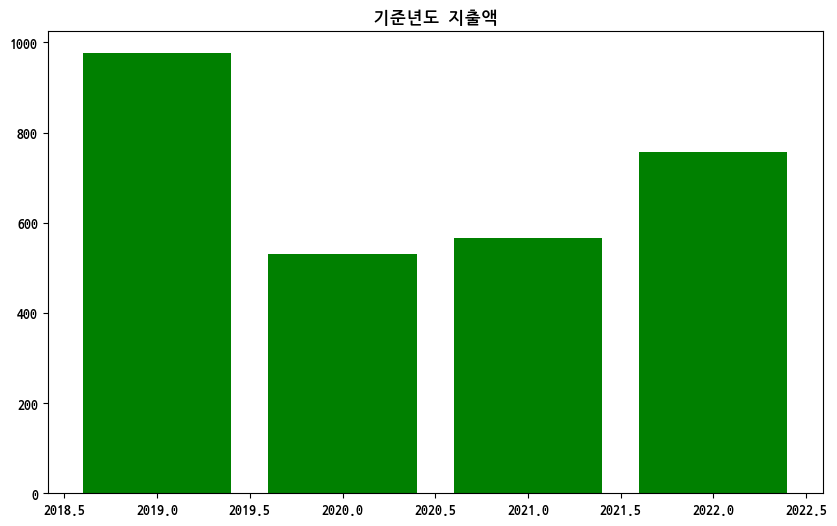

In [70]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241118034542_1인 평균 국내여행 지출액(국내 전체).csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

# 데이터 컬럼 이름 지정
travel_df.columns = ['기준년도','연령대', '지출액(천원)']

# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(travel_df["기준년도"], travel_df["지출액(천원)"], color='green')

plt.title("기준년도 지출액")
plt.show()

<Figure size 640x480 with 0 Axes>

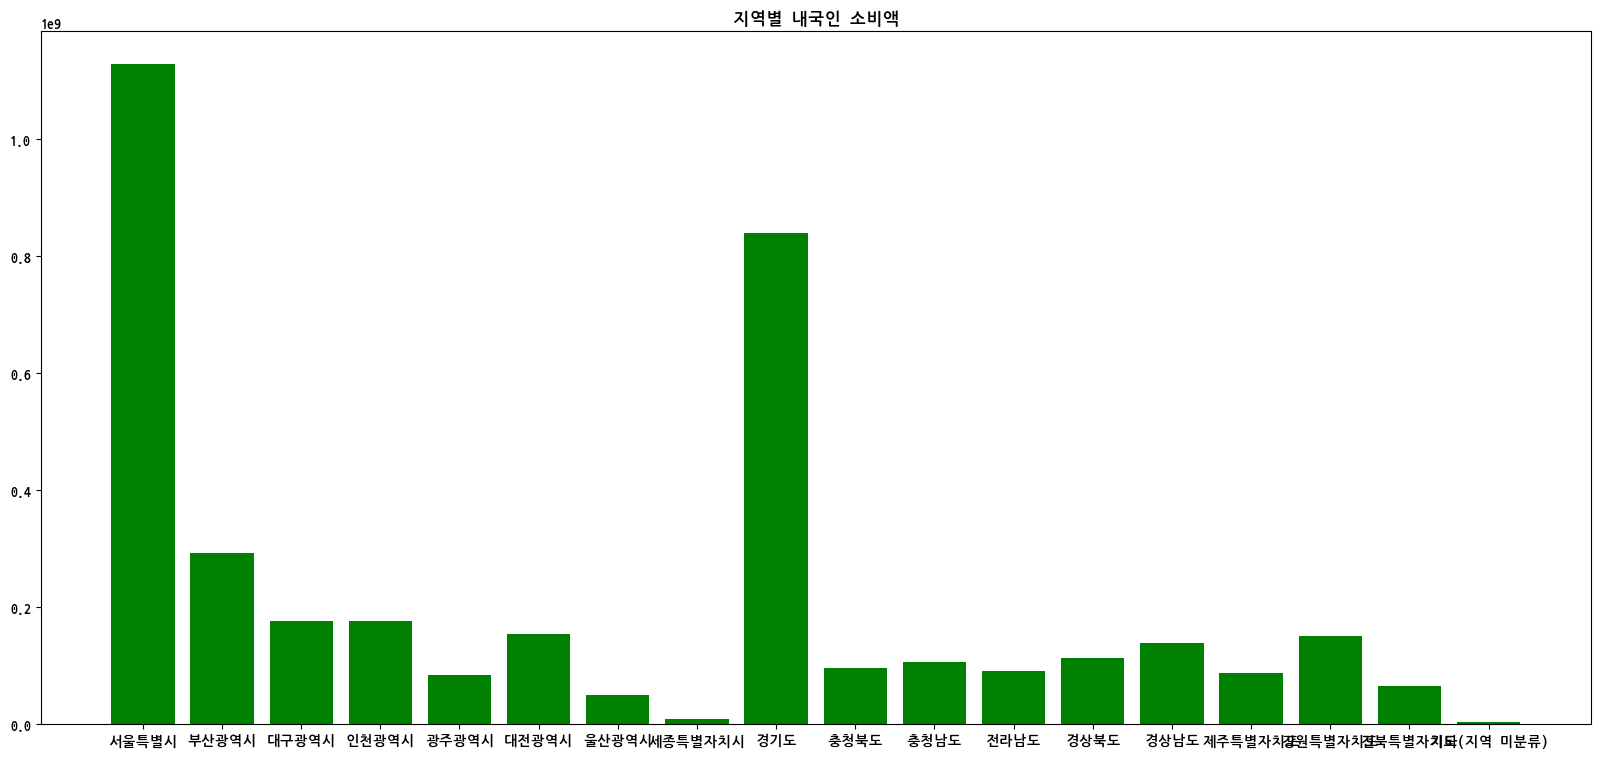

In [71]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241117190401_지역별 내국인 지출액 (BC 신한).csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

# 데이터 컬럼 이름 지정
travel_df.columns = ['기준년월','지자체', 'KTO업종중분류명', '소비액(천원)', '구성비']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["지자체"], travel_df["소비액(천원)"], color='green')

plt.title("지역별 내국인 소비액")
plt.show()

<Figure size 640x480 with 0 Axes>

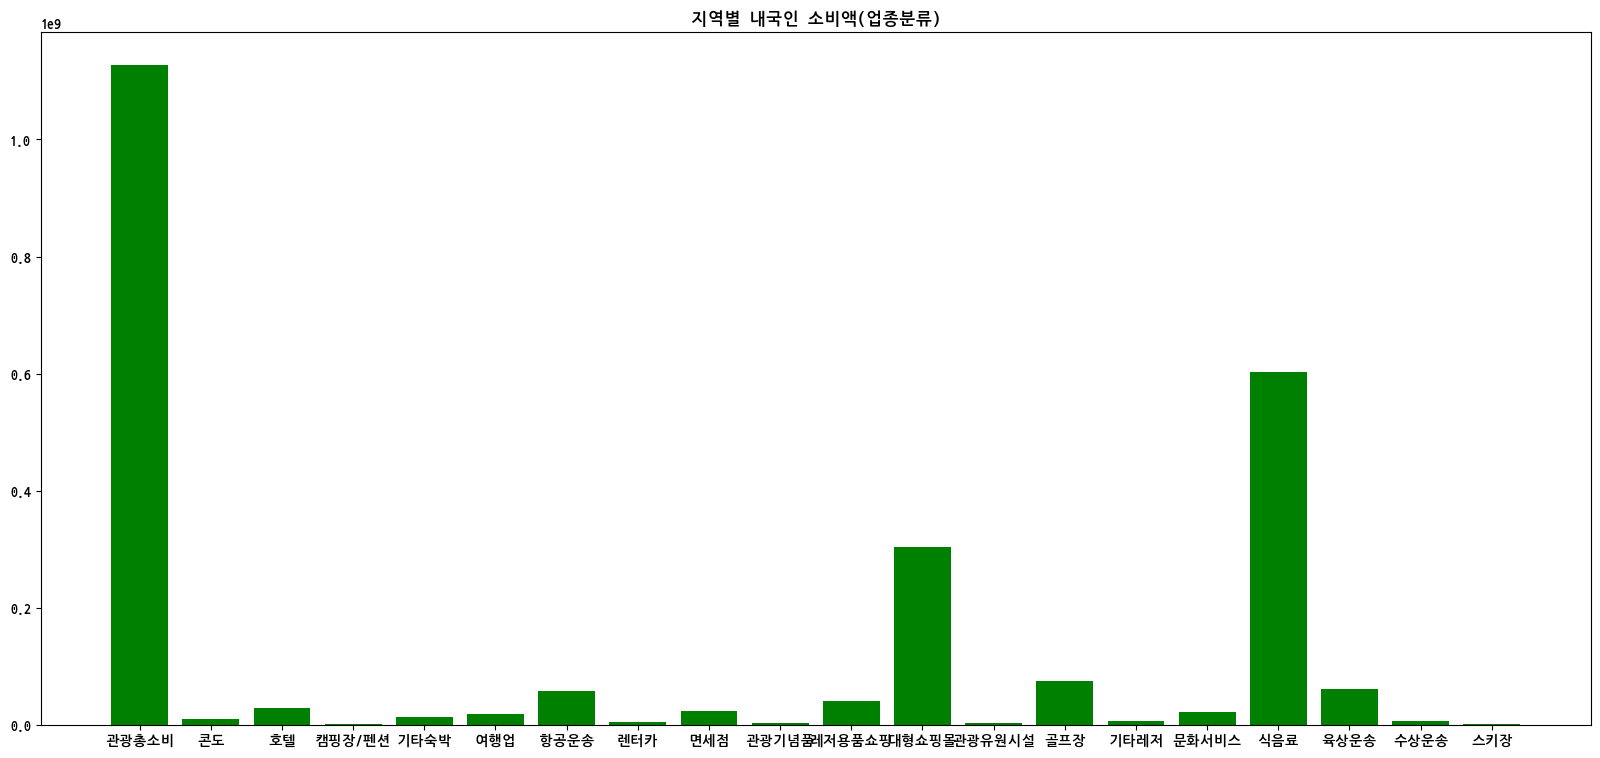

In [72]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241117190401_지역별 내국인 지출액 (BC 신한).csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

# 데이터 컬럼 이름 지정
travel_df.columns = ['기준년월','지자체', 'KTO업종중분류명', '소비액(천원)', '구성비']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["KTO업종중분류명"], travel_df["소비액(천원)"], color='green')

plt.title("지역별 내국인 소비액(업종분류)")
plt.show()

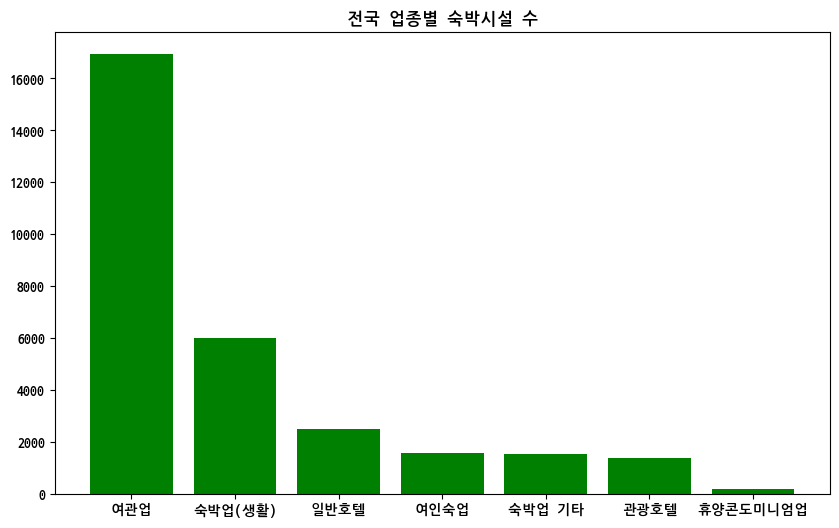

In [28]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120174053_업종별 추이.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['업종명', '기준년도', '숙박영업현황수']

# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(travel_df["업종명"], travel_df["숙박영업현황수"], color='green')

plt.title("전국 업종별 숙박시설 수")
plt.show()

<Figure size 640x480 with 0 Axes>

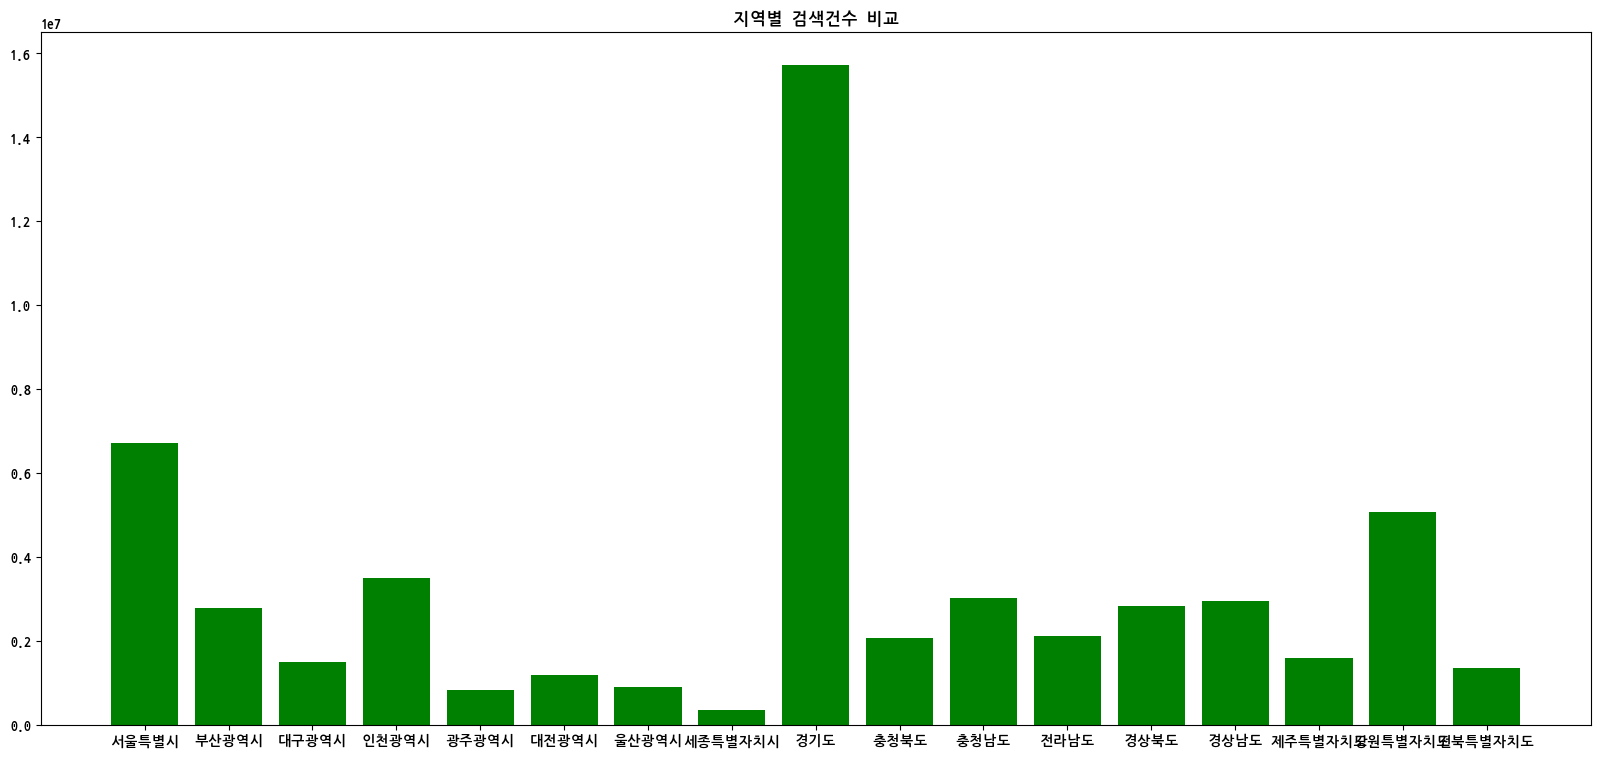

In [46]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120174737_지역별 검색건수.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['기준년월', '지자체', '카테고리중분류명', '검색건수', '전년동기검색건수', '구성비', '전년대비검색증감률']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["지자체"], travel_df["검색건수"], color='green')

plt.title("지역별 검색건수 비교")
plt.show()

<Figure size 640x480 with 0 Axes>

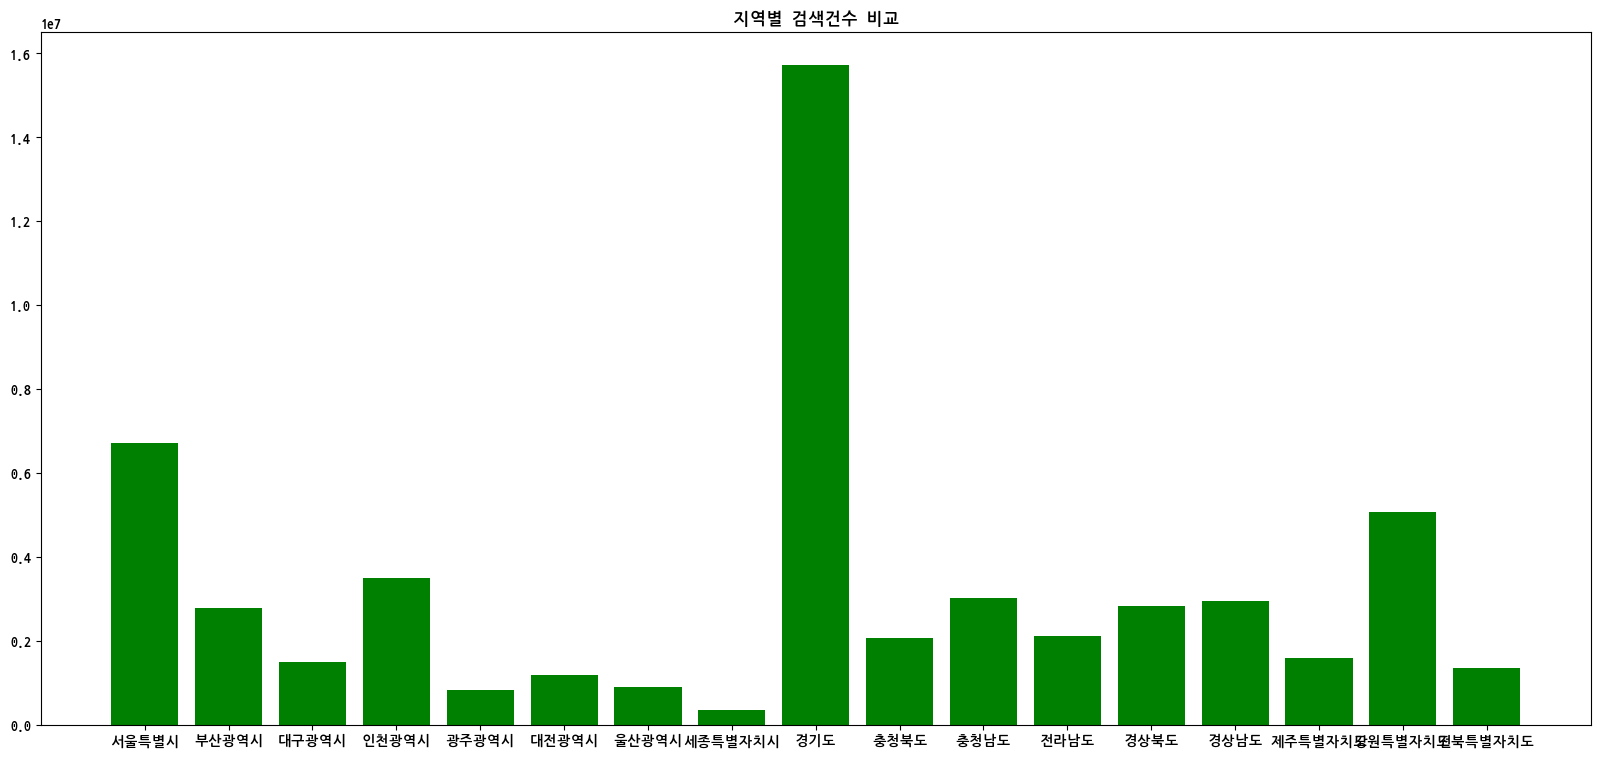

In [47]:
# 데이터 로드
travel_df = pd.read_csv(
    "/content/drive/MyDrive/project/data/project1/20241120174737_지역별 검색건수.csv",
    encoding="euc-kr",
    sep=',',
    index_col=None
)

travel_df.columns = ['기준년월', '지자체', '카테고리중분류명', '검색건수', '전년동기검색건수', '구성비', '전년대비검색증감률']

plt.tight_layout()

# 그래프 생성
plt.figure(figsize=(20, 9))
bars = plt.bar(travel_df["지자체"], travel_df["검색건수"], color='green')

plt.title("지역별 검색건수 비교")
plt.show()

In [49]:
means_df = pd.read_csv("/content/drive/MyDrive/project/data/project1/국민여행조사_국내여행_2023_데이터.csv", encoding="euc-kr", sep=',', index_col=None)


display(means_df.head(1020), means_df.shape)

# Step 5: 데이터 확인
print("데이터 첫 5개 행:")
print(means_df.head())  # 데이터의 처음 5개 행 출력

print("\n데이터프레임 정보:")
print(means_df.info())  # 데이터의 전체 정보 확인

print("\n데이터 통계 요약:")
print(means_df.describe())  # 숫자형 데이터의 통계 요약


UnicodeDecodeError: 'euc_kr' codec can't decode byte 0xbd in position 35449: illegal multibyte sequence

In [3]:
# Step 2: 라이브러리 불러오기
import pandas as pd

# Step 3: 파일 경로 설정
file_path = '/content/drive/MyDrive/project/data/project1/국민여행조사_국내여행_2023_데이터.csv'

# Step 4: CSV 파일 읽기 (utf-8 인코딩)
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print("파일이 utf-8 인코딩으로 성공적으로 열렸습니다!")
except UnicodeDecodeError:
    print("utf-8 인코딩으로 열 수 없습니다. 파일 인코딩을 확인해 주세요.")

# Step 5: 깨진 데이터 확인 및 삭제
# 1) NaN(결측값)이 포함된 행 삭제
df_cleaned = df.dropna()

# 2) 결과 확인
print("\n결측값 제거 후 데이터프레임:")
print(df_cleaned.head())

# Step 6: 데이터 저장 (선택)
# 정리된 데이터를 새로운 CSV 파일로 저장
output_path = '/content/drive/MyDrive/project/data/project1/정리된_데이터.csv'
df_cleaned.to_csv(output_path, index=False, encoding='utf-8')
print(f"\n정리된 데이터가 {output_path}에 저장되었습니다!")

<ipython-input-3-90fc23ff1cbd>:9: DtypeWarning: Columns (14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,64,65,67,68,69,71,72,73,74,76,77,80,82,84,85,88,91,92,99,101,103,107,112,113,124,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,358,359,360,363,364,365,366,371,372,374,376,386) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8')


파일이 utf-8 인코딩으로 성공적으로 열렸습니다!

결측값 제거 후 데이터프레임:
Empty DataFrame
Columns: [ID, SA1_1, SA1_2, SA1_3, SA1_4, SA1_5, SA1_6, MON_EXP_1, MON_EXP_2, MON_EXP_3, MON_EXP_4, MON_EXP_5, MON_EXP_6, D_TRA1_CHECK, D_TRA1_CASE, D_TRA1_SYEAR, D_TRA1_SMONTH, D_TRA1_SDAY, D_TRA1_EYEAR, D_TRA1_EMONTH, D_TRA1_EDAY, D_TRA1_S_Day, D_TRA1_COST, D_TRA1_NUM, D_TRA1_ONE_COST, D_TRA1_VAC, D_TRA1_1_SYEAR, D_TRA1_1_SMONTH, D_TRA1_1_SDAY, D_TRA1_1_EYEAR, D_TRA1_1_EMONTH, D_TRA1_1_EDAY, D_TRA1_1_SPOT, D_TRA1_1_Q6_Ar, D_TRA1_1_Q6, D_TRA1_2_SYEAR, D_TRA1_2_SMONTH, D_TRA1_2_SDAY, D_TRA1_2_EYEAR, D_TRA1_2_EMONTH, D_TRA1_2_EDAY, D_TRA1_2_SPOT, D_TRA1_2_Q6_Ar, D_TRA1_2_Q6, D_TRA1_3_SYEAR, D_TRA1_3_SMONTH, D_TRA1_3_SDAY, D_TRA1_3_EYEAR, D_TRA1_3_EMONTH, D_TRA1_3_EDAY, D_TRA1_3_SPOT, D_TRA1_3_Q6_Ar, D_TRA1_3_Q6, D_TRA1_4_SYEAR, D_TRA1_4_SMONTH, D_TRA1_4_SDAY, D_TRA1_4_EYEAR, D_TRA1_4_EMONTH, D_TRA1_4_EDAY, D_TRA1_4_SPOT, D_TRA1_4_Q6_Ar, D_TRA1_4_Q6, D_TRA1_5_SYEAR, D_TRA1_5_SMONTH, D_TRA1_5_SDAY, D_TRA1_5_EYEAR, D_TRA1_5_EMO

In [5]:
# Step 2: 파일 경로 설정
file_path = '/content/drive/MyDrive/project/data/project1/정리된_데이터.csv'

# Step 3: CSV 파일 읽기
df = pd.read_csv(file_path, encoding='utf-8')  # utf-8 인코딩으로 읽기

print(f"데이터프레임의 행 개수: {len(df)}")
print(df.head())  # 데이터 내용 확인


데이터프레임의 행 개수: 0
Empty DataFrame
Columns: [ID, SA1_1, SA1_2, SA1_3, SA1_4, SA1_5, SA1_6, MON_EXP_1, MON_EXP_2, MON_EXP_3, MON_EXP_4, MON_EXP_5, MON_EXP_6, D_TRA1_CHECK, D_TRA1_CASE, D_TRA1_SYEAR, D_TRA1_SMONTH, D_TRA1_SDAY, D_TRA1_EYEAR, D_TRA1_EMONTH, D_TRA1_EDAY, D_TRA1_S_Day, D_TRA1_COST, D_TRA1_NUM, D_TRA1_ONE_COST, D_TRA1_VAC, D_TRA1_1_SYEAR, D_TRA1_1_SMONTH, D_TRA1_1_SDAY, D_TRA1_1_EYEAR, D_TRA1_1_EMONTH, D_TRA1_1_EDAY, D_TRA1_1_SPOT, D_TRA1_1_Q6_Ar, D_TRA1_1_Q6, D_TRA1_2_SYEAR, D_TRA1_2_SMONTH, D_TRA1_2_SDAY, D_TRA1_2_EYEAR, D_TRA1_2_EMONTH, D_TRA1_2_EDAY, D_TRA1_2_SPOT, D_TRA1_2_Q6_Ar, D_TRA1_2_Q6, D_TRA1_3_SYEAR, D_TRA1_3_SMONTH, D_TRA1_3_SDAY, D_TRA1_3_EYEAR, D_TRA1_3_EMONTH, D_TRA1_3_EDAY, D_TRA1_3_SPOT, D_TRA1_3_Q6_Ar, D_TRA1_3_Q6, D_TRA1_4_SYEAR, D_TRA1_4_SMONTH, D_TRA1_4_SDAY, D_TRA1_4_EYEAR, D_TRA1_4_EMONTH, D_TRA1_4_EDAY, D_TRA1_4_SPOT, D_TRA1_4_Q6_Ar, D_TRA1_4_Q6, D_TRA1_5_SYEAR, D_TRA1_5_SMONTH, D_TRA1_5_SDAY, D_TRA1_5_EYEAR, D_TRA1_5_EMONTH, D_TRA1_5_EDAY, D_TRA1_5_SP

In [6]:
# Step 2: 파일 경로 설정
file_path = '/content/drive/MyDrive/project/data/project1/정리된_데이터.csv'

# Step 3: CSV 파일 읽기
df = pd.read_csv(file_path, encoding='utf-8')  # utf-8 인코딩으로 읽기

if df.empty:
    print("데이터프레임이 비어 있습니다. 파일 내용을 확인하세요.")
else:
    first_row = df.iloc[0]
    print(first_row)


데이터프레임이 비어 있습니다. 파일 내용을 확인하세요.


In [8]:
#Step 2: 파일 경로 설정
file_path = '/content/drive/MyDrive/project/data/project1/정리된_데이터.csv'

# Step 3: CSV 파일 읽기
df = pd.read_csv(file_path, encoding='utf-8')  # utf-8 인코딩으로 읽기

print(f"데이터프레임의 크기: {df.shape}")  # (행 개수, 열 개수)

if len(df) > 0:
    first_row = df.iloc[0]
    print(first_row)
else:
    print("데이터프레임에 데이터가 없습니다.")


데이터프레임의 크기: (0, 1378)
데이터프레임에 데이터가 없습니다.


In [9]:
#Step 2: 파일 경로 설정
file_path = '/content/drive/MyDrive/project/data/project1/정리된_데이터.csv'

# Step 3: CSV 파일 읽기
df = pd.read_csv(file_path, encoding='utf-8')  # utf-8 인코딩으로 읽기

df = pd.read_csv(file_path, encoding='utf-8', header=None)
print(df.head())


  0      1      2      3      4      5      6          7          8     \
0   ID  SA1_1  SA1_2  SA1_3  SA1_4  SA1_5  SA1_6  MON_EXP_1  MON_EXP_2   

        9     ...   1368   1369  1370  1371  1372  1373  1374    1375  \
0  MON_EXP_3  ...  BINC1  BINC2  BEDU  BMAR  BFAM  BMON  BARA  WT_DOM   

          1376          1377  
0  ����_���࿩��  ����_���ڿ���  

[1 rows x 1378 columns]


In [10]:
# Step 2: 라이브러리 불러오기
import pandas as pd

# Step 3: 파일 경로 설정
file_path = '/content/drive/MyDrive/project/data/project1/국민여행조사_국내여행_2023_데이터.csv'

# Step 4: CSV 파일 읽기 (utf-8 인코딩)
try:
    df = pd.read_csv(file_path, encoding='utf-8')  # utf-8 인코딩 시도
    print("파일이 utf-8 인코딩으로 성공적으로 열렸습니다!")
except UnicodeDecodeError:
    print("utf-8 인코딩으로 열 수 없습니다. 파일 인코딩을 확인해 주세요.")

# Step 5: 데이터 확인
print("\n데이터 첫 5개 행:")
print(df.head())  # 데이터의 처음 5개 행 출력

print("\n데이터프레임 정보:")
print(df.info())  # 데이터프레임 전체 정보 출력

print("\n데이터 통계 요약:")
print(df.describe())  # 숫자형 데이터의 통계 요약


<ipython-input-10-8d11a013db02>:9: DtypeWarning: Columns (14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,64,65,67,68,69,71,72,73,74,76,77,80,82,84,85,88,91,92,99,101,103,107,112,113,124,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,358,359,360,363,364,365,366,371,372,374,376,386) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8')  # utf-8 인코딩 시도


파일이 utf-8 인코딩으로 성공적으로 열렸습니다!

데이터 첫 5개 행:
                   ID  SA1_1  SA1_2  SA1_3  SA1_4  SA1_5  SA1_6  MON_EXP_1  \
0  11010560931_124820      0      0      0      0      0      0          2   
1  11010560931_124821      1      0      0      0      0      0          1   
2  11010560931_124823      0      0      0      0      0      0          2   
3  11010560931_124825      0      0      0      0      0      0          2   
4  11010560931_124833      1      0      0      0      0      0          1   

   MON_EXP_2  MON_EXP_3  ...  BINC1  BINC2  BEDU BMAR BFAM BMON BARA WT_DOM  \
0          2          2  ...    NaN    NaN   NaN  NaN  NaN  NaN  NaN    NaN   
1          2          2  ...    NaN    NaN   NaN  NaN  NaN  NaN  NaN    NaN   
2          2          2  ...    NaN    NaN   NaN  NaN  NaN  NaN  NaN    NaN   
3          2          2  ...    NaN    NaN   NaN  NaN  NaN  NaN  NaN    NaN   
4          2          2  ...    NaN    NaN   NaN  NaN  NaN  NaN  NaN    NaN   

  ����_���࿩�� 

In [11]:
# Step 2: 라이브러리 불러오기
import pandas as pd

# Step 3: 파일 경로 설정
file_path = '/content/drive/MyDrive/project/data/project1/정리된_데이터.csv'

# Step 4: CSV 파일 읽기 (utf-8 인코딩)
try:
    df = pd.read_csv(file_path, encoding='utf-8')  # utf-8 인코딩 시도
    print("파일이 utf-8 인코딩으로 성공적으로 열렸습니다!")
except UnicodeDecodeError:
    print("utf-8 인코딩으로 열 수 없습니다. 파일 인코딩을 확인해 주세요.")

# Step 5: 데이터 확인
print("\n데이터 첫 5개 행:")
print(df.head())  # 데이터의 처음 5개 행 출력

print("\n데이터프레임 정보:")
print(df.info())  # 데이터프레임 전체 정보 출력

print("\n데이터 통계 요약:")
print(df.describe())  # 숫자형 데이터의 통계 요약

파일이 utf-8 인코딩으로 성공적으로 열렸습니다!

데이터 첫 5개 행:
Empty DataFrame
Columns: [ID, SA1_1, SA1_2, SA1_3, SA1_4, SA1_5, SA1_6, MON_EXP_1, MON_EXP_2, MON_EXP_3, MON_EXP_4, MON_EXP_5, MON_EXP_6, D_TRA1_CHECK, D_TRA1_CASE, D_TRA1_SYEAR, D_TRA1_SMONTH, D_TRA1_SDAY, D_TRA1_EYEAR, D_TRA1_EMONTH, D_TRA1_EDAY, D_TRA1_S_Day, D_TRA1_COST, D_TRA1_NUM, D_TRA1_ONE_COST, D_TRA1_VAC, D_TRA1_1_SYEAR, D_TRA1_1_SMONTH, D_TRA1_1_SDAY, D_TRA1_1_EYEAR, D_TRA1_1_EMONTH, D_TRA1_1_EDAY, D_TRA1_1_SPOT, D_TRA1_1_Q6_Ar, D_TRA1_1_Q6, D_TRA1_2_SYEAR, D_TRA1_2_SMONTH, D_TRA1_2_SDAY, D_TRA1_2_EYEAR, D_TRA1_2_EMONTH, D_TRA1_2_EDAY, D_TRA1_2_SPOT, D_TRA1_2_Q6_Ar, D_TRA1_2_Q6, D_TRA1_3_SYEAR, D_TRA1_3_SMONTH, D_TRA1_3_SDAY, D_TRA1_3_EYEAR, D_TRA1_3_EMONTH, D_TRA1_3_EDAY, D_TRA1_3_SPOT, D_TRA1_3_Q6_Ar, D_TRA1_3_Q6, D_TRA1_4_SYEAR, D_TRA1_4_SMONTH, D_TRA1_4_SDAY, D_TRA1_4_EYEAR, D_TRA1_4_EMONTH, D_TRA1_4_EDAY, D_TRA1_4_SPOT, D_TRA1_4_Q6_Ar, D_TRA1_4_Q6, D_TRA1_5_SYEAR, D_TRA1_5_SMONTH, D_TRA1_5_SDAY, D_TRA1_5_EYEAR, D_TRA1_5_EMONTH, 